<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/TpFiltros/TPimagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP2 - Filtros 
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

###Imports a utilizar

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

####Cargamos imágenes

In [2]:
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/boost.PNG
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/cameraman.tif
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/eight.tif
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/blurry_moon.tif
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/tun.jpg
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/zebra.png
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/Letra_a.png
!wget https://raw.githubusercontent.com/lufernandez/imagaynes/master/TpFiltros/starry_sky.png

clear_output()

###1. Filtros pasa bajos

####mostramos imagen original y definimos funciones a utilizar

In [3]:
#definimos la funcion del filtro: recibe el tamaño del kernel,
#y la imagen sobre la que se aplica el filtro, se usa filtro promediador
def ApplyLowPass(img, k_size=3):
  kernel = np.full((k_size, k_size), 1)/(k_size**2)
  return cv2.filter2D(img,-1,kernel)

#ploteamos secuencia
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)

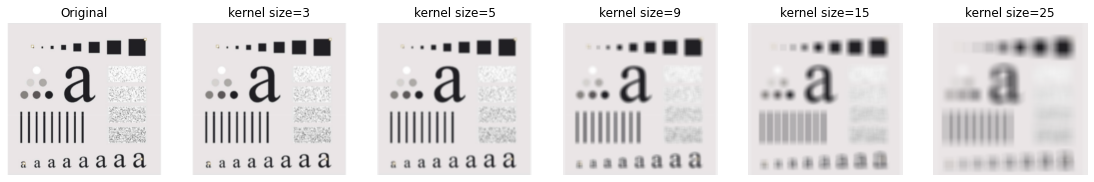

In [4]:
#Original
letra_a = cv2.imread('Letra_a.png')
kernel_sizes = [3,5,9,15,25]
fig_a = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

MakeSubplot(letra_a,fig_a,1,6,1,title="Original")

for i in range(len(kernel_sizes)):
  filtered = ApplyLowPass(letra_a, kernel_sizes[i])
  MakeSubplot(filtered,fig_a,1,6,i+2,title='kernel size='+str(kernel_sizes[i]))

###2. Filtros pasa bajos con threshold

In [5]:
#definimos la funcion del filtro: recibe el tamaño del kernel,
#y la imagen sobre la que se aplica el filtro, se usa filtro promediador
def ApplyLowPassWThreshold(img, k_size=3, thresh=0.25):
  kernel = np.full((k_size, k_size), 1)/(k_size**2)
  low_pass = cv2.filter2D(img,-1,kernel)
  def threshold(filtered, thresh=0.25):
    filtered[filtered > (255*0.25)] = 255
    filtered[filtered < 255*0.25] = 0
    return filtered
  thresh = threshold(np.copy(low_pass), thresh=0.25)
  return low_pass, thresh

#ploteamos secuencia
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)

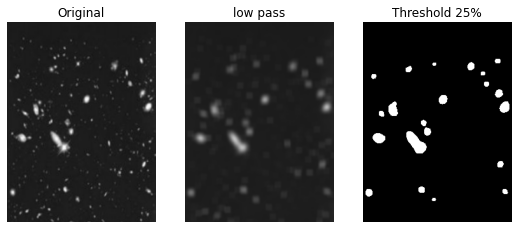

In [6]:
#Original
sky = cv2.imread('starry_sky.png')
fig_sky = plt.figure(figsize=(7,7))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

MakeSubplot(sky,fig_sky,1,3,1,title="Original")
low_pass, thresh = ApplyLowPassWThreshold(sky, k_size=10, thresh=0.25)
MakeSubplot(low_pass,fig_sky,1,3,2,title="low pass")
MakeSubplot(thresh,fig_sky,1,3,3,title="Threshold 25%")


###3. Filtros no lineales

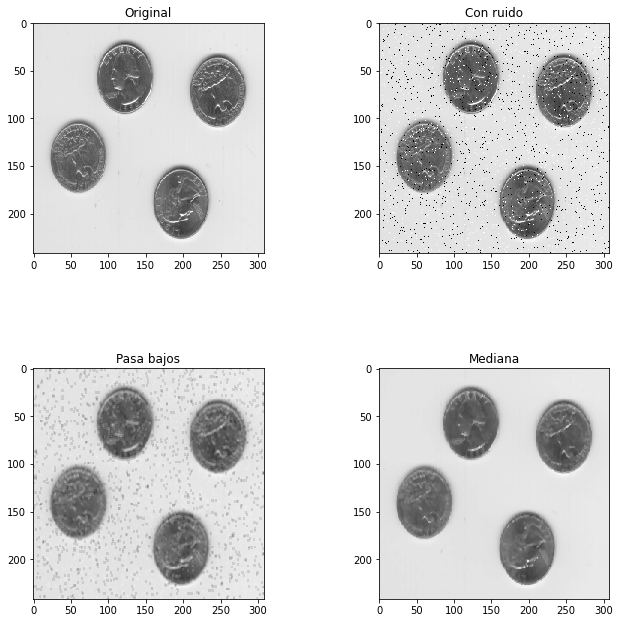

In [7]:
img = cv2.imread('eight.tif')
fig_1 = plt.figure(figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)
#Imagen original
fig_1.add_subplot(2,2,1)
plt.title("Original")
plt.imshow(img,interpolation='nearest', aspect='auto')

for row in range(0,img.shape[0]):
  saltpepper_noise = np.random.uniform(low=0,high=255,size=img.shape[1]);
  for col in range(0,img.shape[1]):
    noise_sample = saltpepper_noise[col]
    if noise_sample <5:
      img[row][col] = [0, 0, 0]
    elif noise_sample >250:
      img[row][col] = [255, 255, 255]
#Imagen con ruido "saltpepper"
fig_1.add_subplot(2,2,2)
plt.title("Con ruido")
plt.imshow(img,interpolation='nearest', aspect='auto')
#Imagen luego de ser filtrada por un LP
kernel = np.ones((3,3),np.float32)/9
filtered = cv2.filter2D(img,-1,kernel)
fig_1.add_subplot(2,2,3)
plt.title("Pasa bajos")
plt.imshow(filtered,interpolation='nearest', aspect='auto')
#Imagen filtrada tomando la mediana
med_filtered = cv2.medianBlur(img,3)
fig_1.add_subplot(2,2,4)
plt.title("Mediana")
plt.imshow(med_filtered,interpolation='nearest', aspect='auto')
plt.show()


###4. Filtros pasa altos - Laplaciano

####Sin diagonales

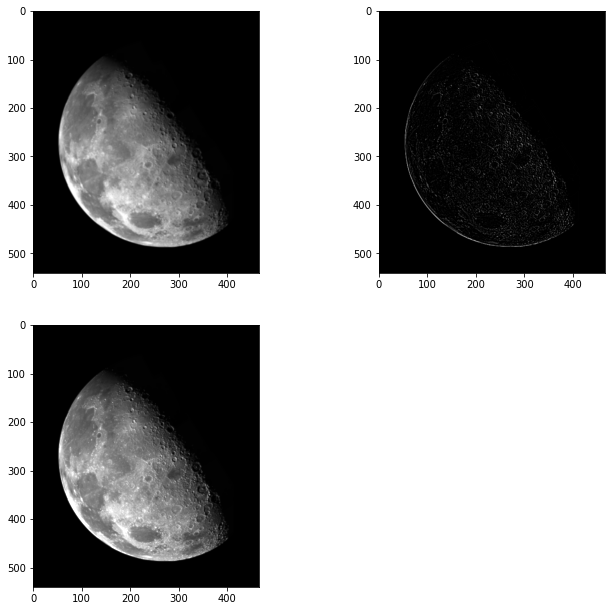

In [8]:
moon_img = cv2.imread('blurry_moon.tif', cv2.IMREAD_GRAYSCALE)
fig_2 = plt.figure(figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.5)
fig_2.add_subplot(2,2,1)
plt.imshow(moon_img,cmap='gray')
#Filtro Laplaciano
kernel = np.array([
                   [0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]
])
hp_filtered = cv2.filter2D(moon_img,-1,kernel)
hp_filtered[hp_filtered < 0] = 0
fig_2.add_subplot(2,2,2)
plt.imshow(hp_filtered,cmap='gray')

sharpe = moon_img.astype(np.int16) + hp_filtered.astype(np.int16)

fig_2.add_subplot(2,2,3)
plt.imshow(sharpe,cmap='gray', vmin=0, vmax=255)
plt.show()


####Con diagonales

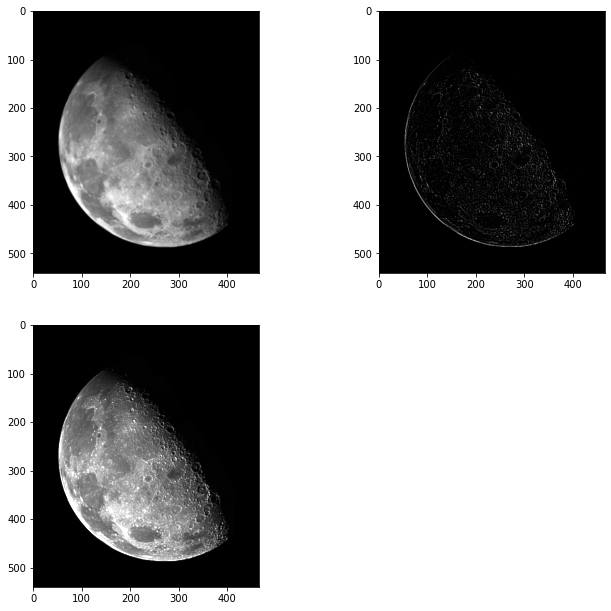

In [9]:
moon_img = cv2.imread('blurry_moon.tif', cv2.IMREAD_GRAYSCALE)
fig_2 = plt.figure(figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.5)
fig_2.add_subplot(2,2,1)
plt.imshow(moon_img,cmap='gray')
#Filtro Laplaciano
kernel = np.array([
                   [-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]
])
hp_filtered = cv2.filter2D(moon_img,-1,kernel)
fig_2.add_subplot(2,2,2)
plt.imshow(hp_filtered,cmap='gray', vmin=0, vmax=255)

sharpe = moon_img.astype(np.int16) + hp_filtered.astype(np.int16)

fig_2.add_subplot(2,2,3)
plt.imshow(sharpe,cmap='gray', vmin=0, vmax=255)
plt.show()

###5 Filtros pasa altos - High Boost

In [10]:
def ApplyHighBoost(img,A=1):
  kernel = np.array([
                   [-1,-1,-1],
                   [-1,A+8,1],
                   [-1,-1,-1]
                  ])
  return cv2.filter2D(img,-1,kernel)

def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.imshow(img,cmap='gray', vmin=0)

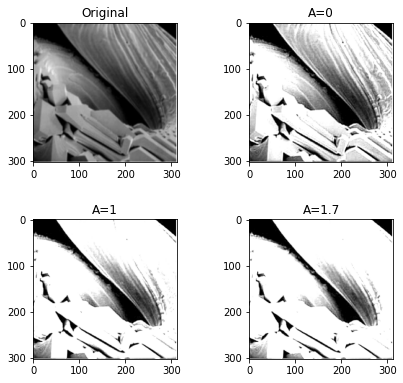

In [11]:
boost_img = cv2.imread('boost.PNG')

#Original
fig_3 = plt.figure(figsize=(5,5))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.5)
MakeSubplot(boost_img,fig_3,2,2,1,title="Original")

#Laplaciano de la imagen original
laplaciano = ApplyHighBoost(boost_img,A=0)
MakeSubplot(laplaciano,fig_3,2,2,2,title="A=0")

#Sin high boost
not_boosted = ApplyHighBoost(boost_img,A=1)
MakeSubplot(not_boosted,fig_3,2,2,3,title="A=1")

#Con high boost
boosted = ApplyHighBoost(boost_img,A=1.7)
MakeSubplot(boosted,fig_3,2,2,4,title="A=1.7")

plt.show()

###6. Túnel (homomórfico)

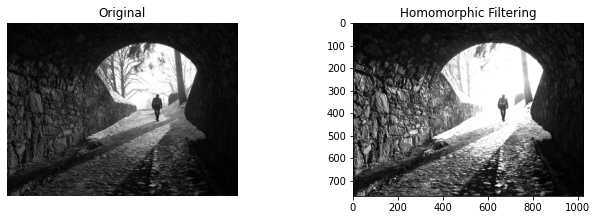

In [12]:
from scipy import signal

tun = cv2.imread('tun.jpg')
fig_2 = plt.figure(figsize =(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.5)
fig_2.add_subplot(1,2,1)
plt.title("Original")
plt.axis('off')
plt.imshow(tun,cmap='gray')


# Take the image to log domain and then to frequency domain 
tun_log = np.log1p(np.array(tun, dtype="float"))
tun_fft = np.fft.fft2(tun_log)
tun_fft = np.fft.fftshift(tun_fft)

#filtro gaussiano - ecuacion 4-112 y 4-147 del libro
P = tun_fft.shape[0]/2
Q = tun_fft.shape[1]/2
U, V = np.meshgrid(np.linspace(-1, 1, tun_fft.shape[1]), np.linspace(-1, 1, tun_fft.shape[1]))
Duv = ((U-P)**2+(V-Q)**2).astype(float)
y_l = 0.8
y_h = 1.17
Hu_v = (y_h-y_l)*(1.0 - np.exp(-(5.0*Duv)/(20.0**2)))+y_l

for i in range(tun_fft.shape[0]):
    for j in range(tun_fft.shape[1]):
      tun_fft[i][j] *= Hu_v[i][j]

tun_filt = np.fft.ifft2(np.fft.ifftshift(tun_fft))
final = np.exp(np.real(tun_filt))-1.0
final[final > 255.0] = 255.0
final = np.uint8(final)


fig_2.add_subplot(1,2,2)
plt.title("Homomorphic Filtering")
#plt.axis('off')
plt.imshow(final, cmap='gray', vmin=0, vmax=255)
plt.show()
